In [5]:
%load_ext autoreload
%autoreload 2
import numpy as np
import os
import matplotlib.pyplot as plt
from configs import project_config
from configs.RecursiveVPSDE.Markovian_fBiPotDDims_NonSep.recursive_Markovian_PostMeanScore_fBiPot8DimsNS_T256_H05_tl_110data_StbleTgt import get_config

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
num_paths = 10240
root_dir ="/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/"
config = get_config()

In [7]:
def get_drift_files(config, root_dir):
    ts_type = f"{config.ndims}DDims"
    include = (f"_{num_paths}NPaths_{config.t0}t0_{config.deltaT:.3e}dT_").replace(".", "")
    root_nadaraya_dir = root_dir + f"ExperimentResults/Nadaraya/8DDimsNS/"
    true_files = []
    local_files = []
    for file in os.listdir(root_nadaraya_dir):
        if "IIDNadaraya" in file and ts_type in file and include in file:
            if "true" in file:
                true_files.append(root_nadaraya_dir+file)
            elif "global" in file:
                local_files.append(root_nadaraya_dir+file)
    assert len(true_files)>0, "No true files found"
    assert len(local_files)>0, "No local files found"
    assert (len(true_files) == len(local_files))
    def extract_bw_number(s):
        match = s.split("/")[-1].split("_")[4][:-2]
        return float("0." + match)
    true_files = sorted(true_files, key=extract_bw_number)
    local_files = sorted(local_files, key=extract_bw_number)
    bws = [extract_bw_number(f) for f in true_files]
    return true_files, local_files, bws

In [8]:
true_files, local_files, bws = get_drift_files(config=config, root_dir=root_dir)
local_files

['/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/ExperimentResults/Nadaraya/8DDimsNS/IIDNadaraya_fBiPot_8DDimsNS_DriftTrack_0018211bw_10240NPaths_00t0_3906e-03dT_025a_-20b_00c_global_states.npy',
 '/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/ExperimentResults/Nadaraya/8DDimsNS/IIDNadaraya_fBiPot_8DDimsNS_DriftTrack_0024046bw_10240NPaths_00t0_3906e-03dT_025a_-20b_00c_global_states.npy',
 '/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/ExperimentResults/Nadaraya/8DDimsNS/IIDNadaraya_fBiPot_8DDimsNS_DriftTrack_0031749bw_10240NPaths_00t0_3906e-03dT_025a_-20b_00c_global_states.npy',
 '/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/ExperimentResults/Nadaraya/8DDimsNS/IIDNadaraya_fBiPot_8DDimsNS_DriftTrack_0041919bw_10240NPaths_00t0_3906e-03dT_025a_-20b_00c_global_states.npy',
 '/Users

/var/folders/68/vrxg2n311sz1gs264pkys2zh0000gn/T/ipykernel_6704/1556877753.py:13: RuntimeWarning: invalid value encountered in divide
  total_local_errors = np.sqrt(np.mean(all_global_errors, axis=(0)))/np.sqrt(time_steps)
/var/folders/68/vrxg2n311sz1gs264pkys2zh0000gn/T/ipykernel_6704/1556877753.py:14: RuntimeWarning: invalid value encountered in divide
  all_paths_err = np.sqrt(all_global_errors)/np.sqrt(time_steps)


9.291293611018805 0.0018211 inf


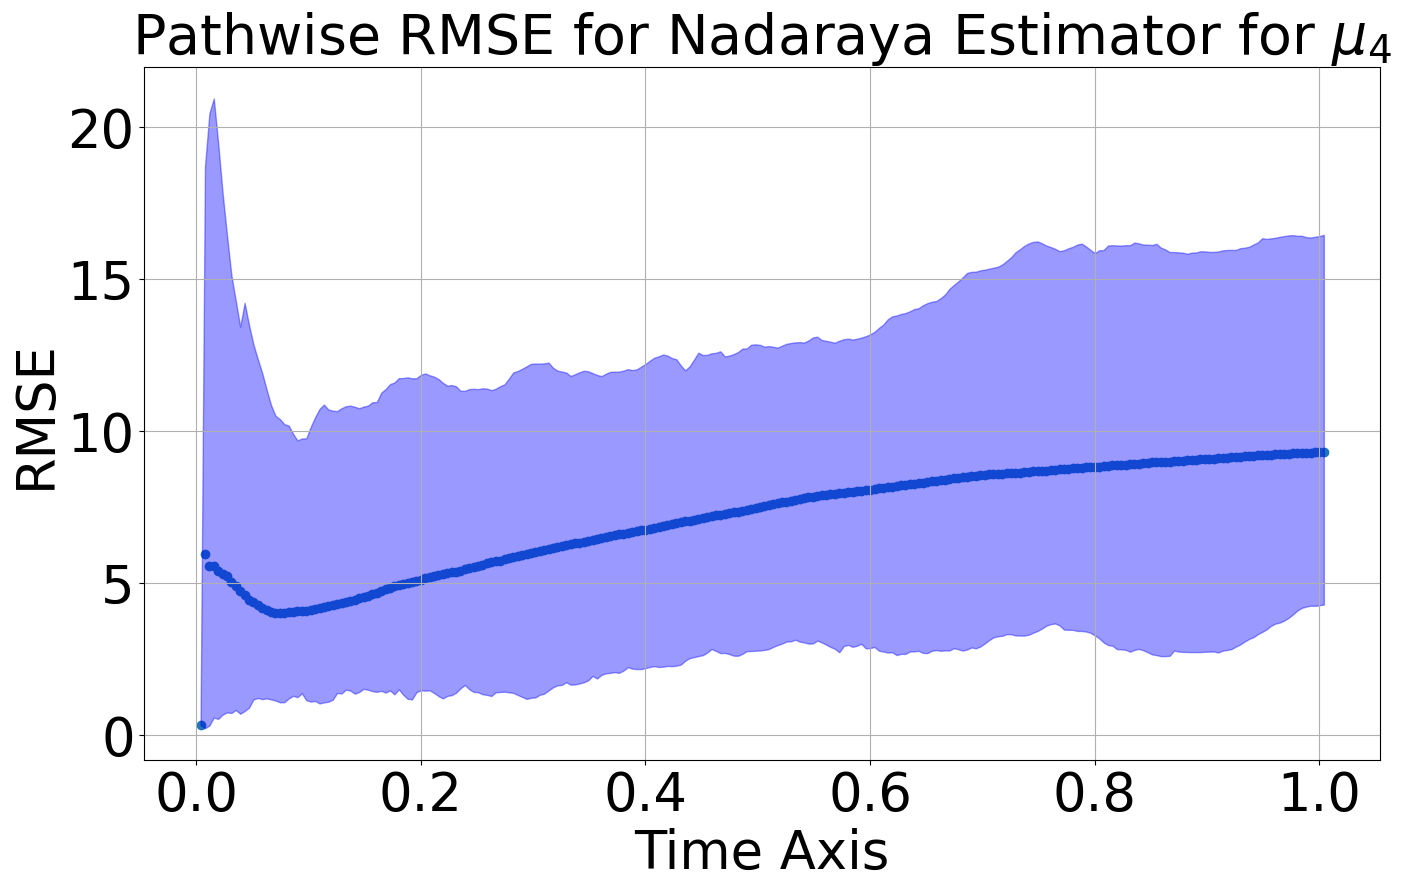

Final time cumulative MSE local-time error 9.291293611018805 with IQR ((4.278445264871734, 16.443699950938786))at bwidx 1

1
9.357376224784215 0.0024046 9.291293611018805
2
9.471065339431714 0.0031749 9.291293611018805
3
9.552245817053187 0.0041919 9.291293611018805
4
9.610956091000423 0.0055348 9.291293611018805
5
9.522916788687253 0.0073079 9.291293611018805
6
9.482846627155334 0.009649 9.291293611018805
7
9.308256451250685 0.0127401 9.291293611018805
8
9.057668327367978 0.0168214 9.291293611018805


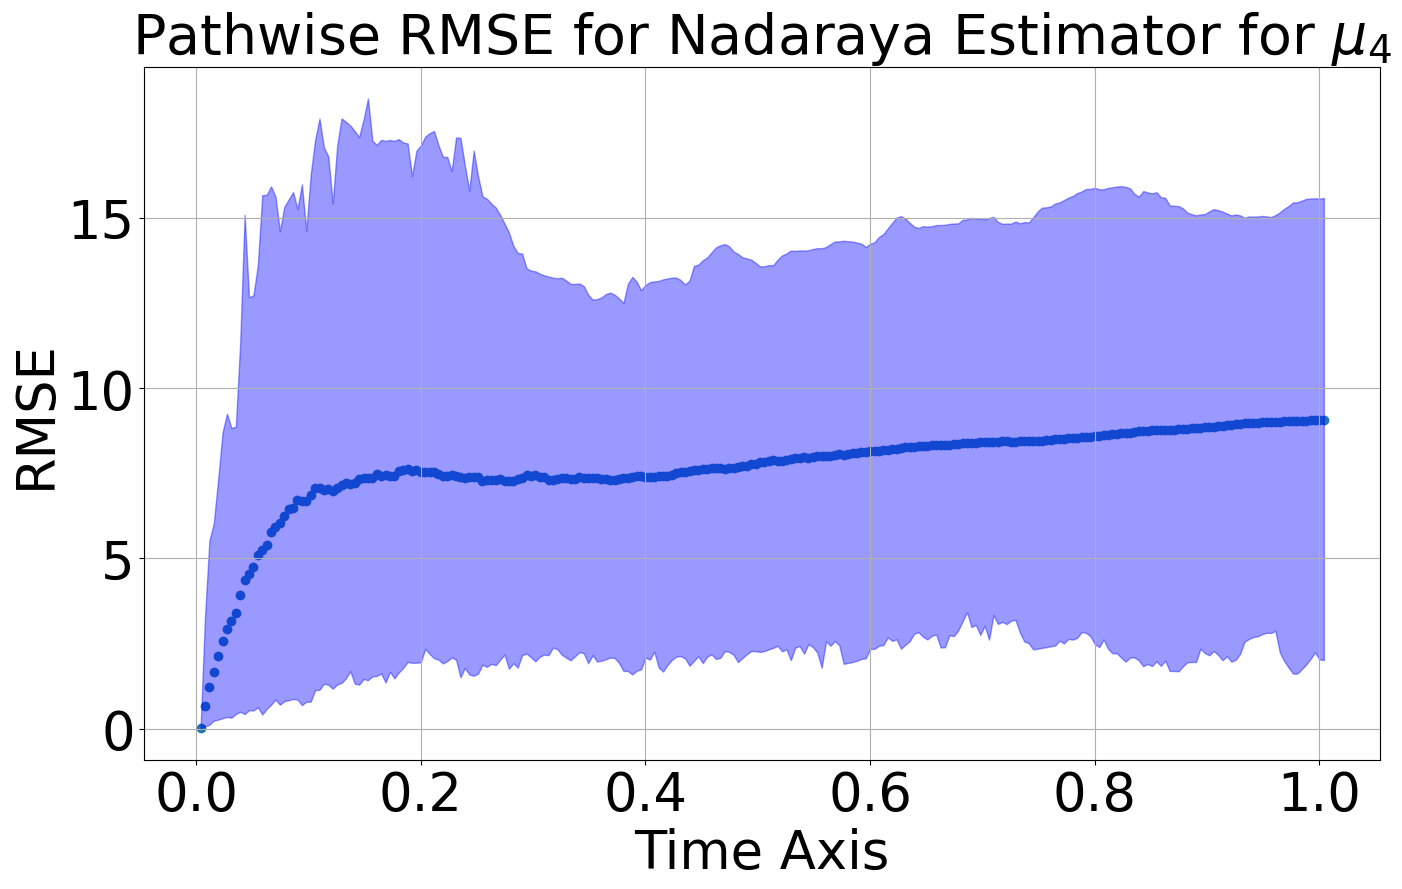

Final time cumulative MSE local-time error 9.057668327367978 with IQR ((2.0174031609803955, 15.577807976078567))at bwidx 9

9
8.475903139416664 0.0222102 9.057668327367978


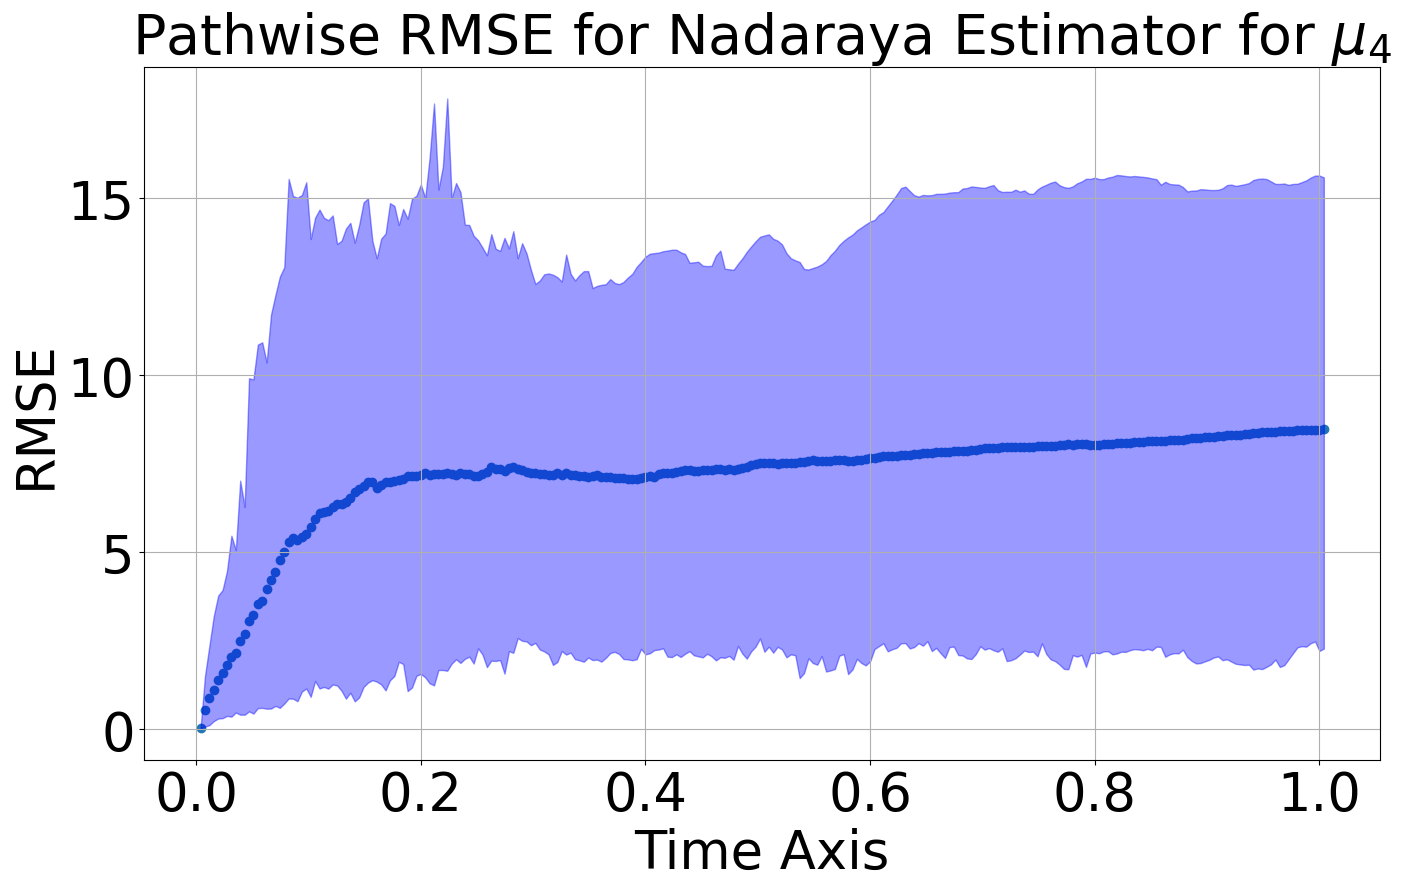

Final time cumulative MSE local-time error 8.475903139416664 with IQR ((2.2789988198405227, 15.597168807884202))at bwidx 10

10
7.715597509433202 0.0293252 8.475903139416664


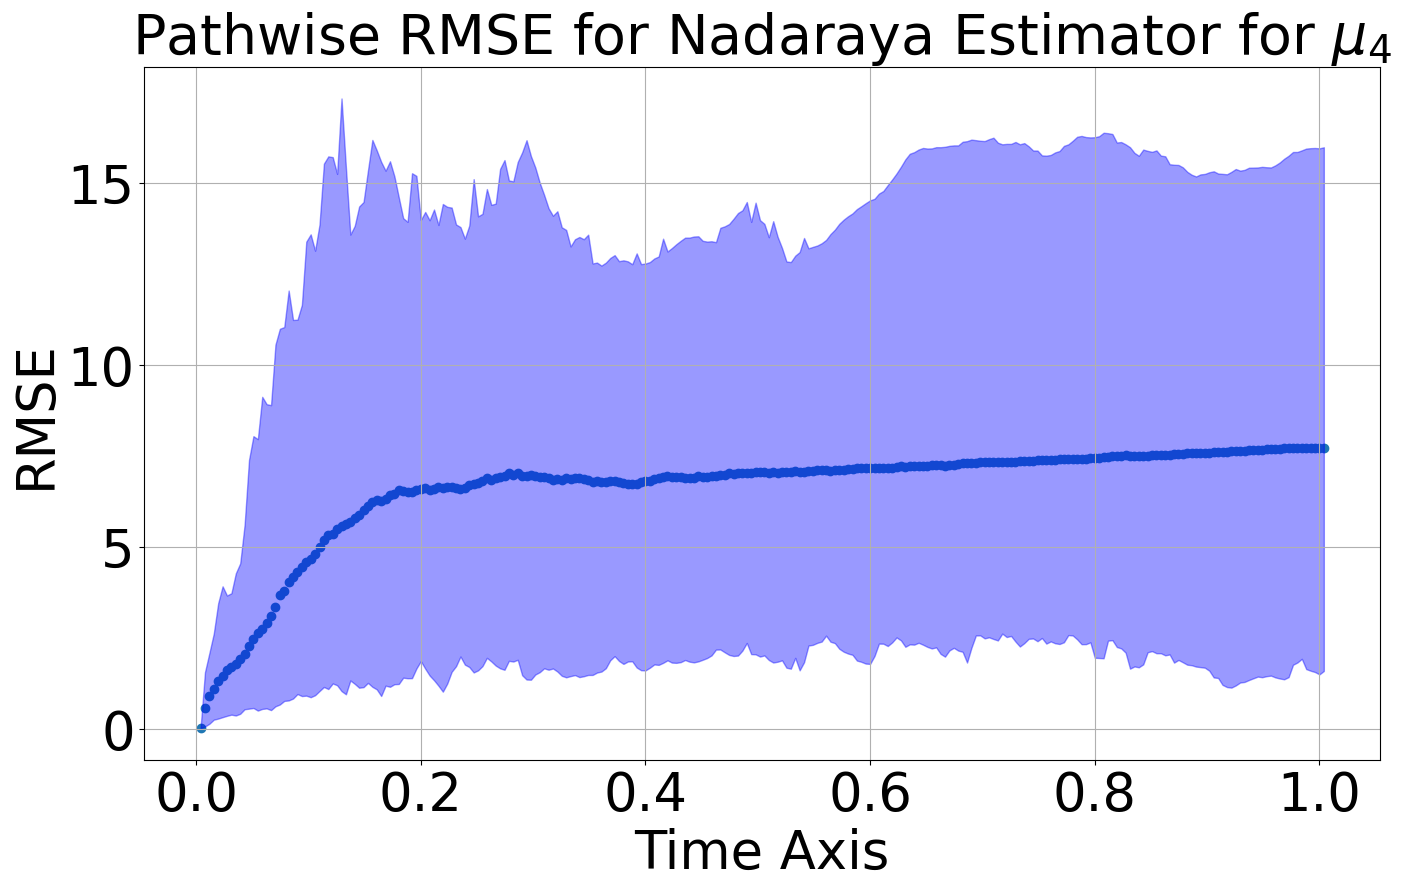

Final time cumulative MSE local-time error 7.715597509433202 with IQR ((1.5896421950597734, 15.969139876785864))at bwidx 11

11
7.181359624461133 0.0387196 7.715597509433202


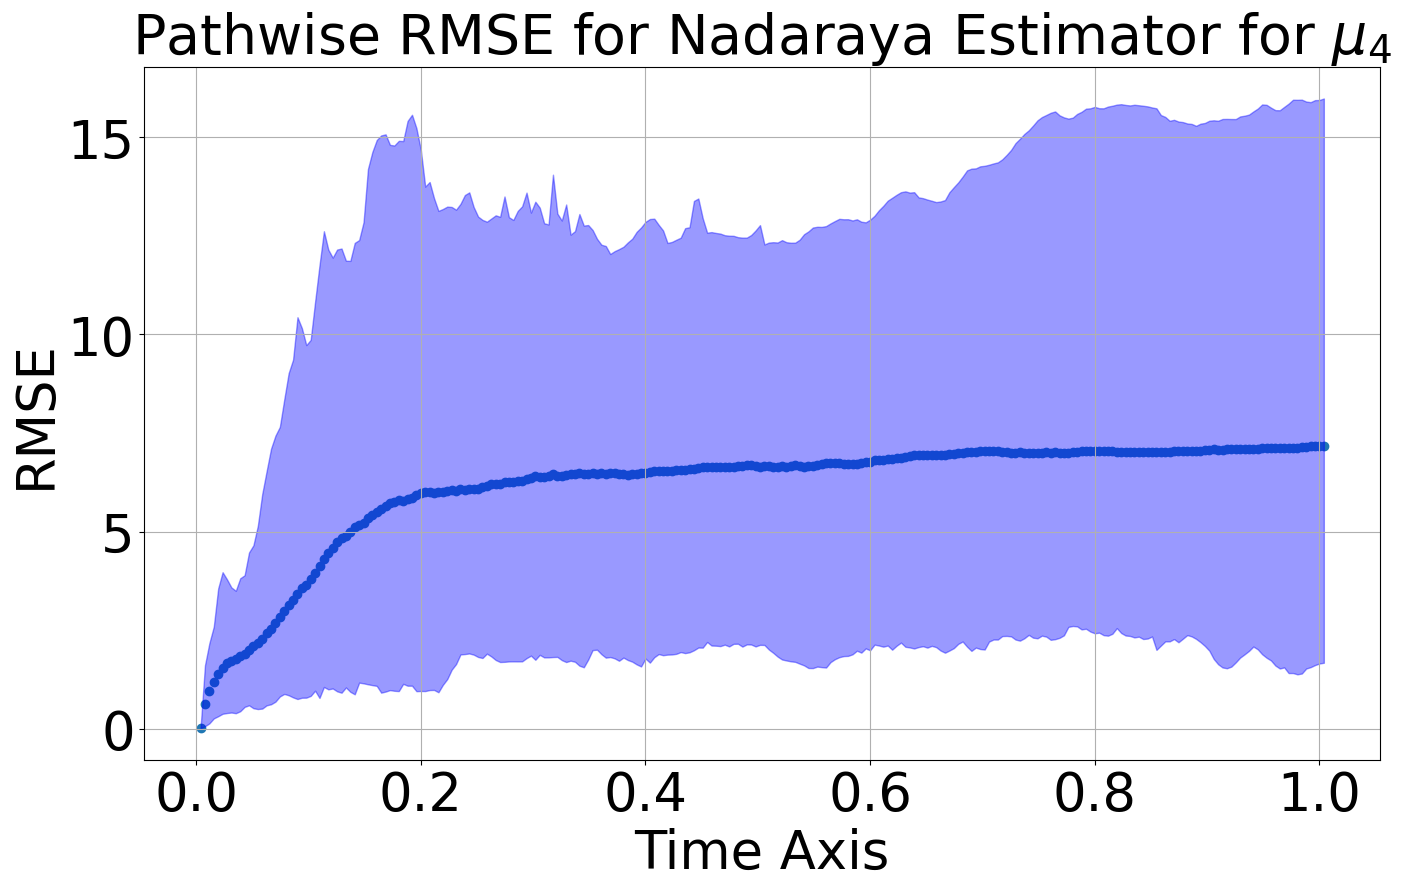

Final time cumulative MSE local-time error 7.181359624461133 with IQR ((1.6725055654883263, 15.98253083307177))at bwidx 12

12
6.818805733795702 0.0511235 7.181359624461133


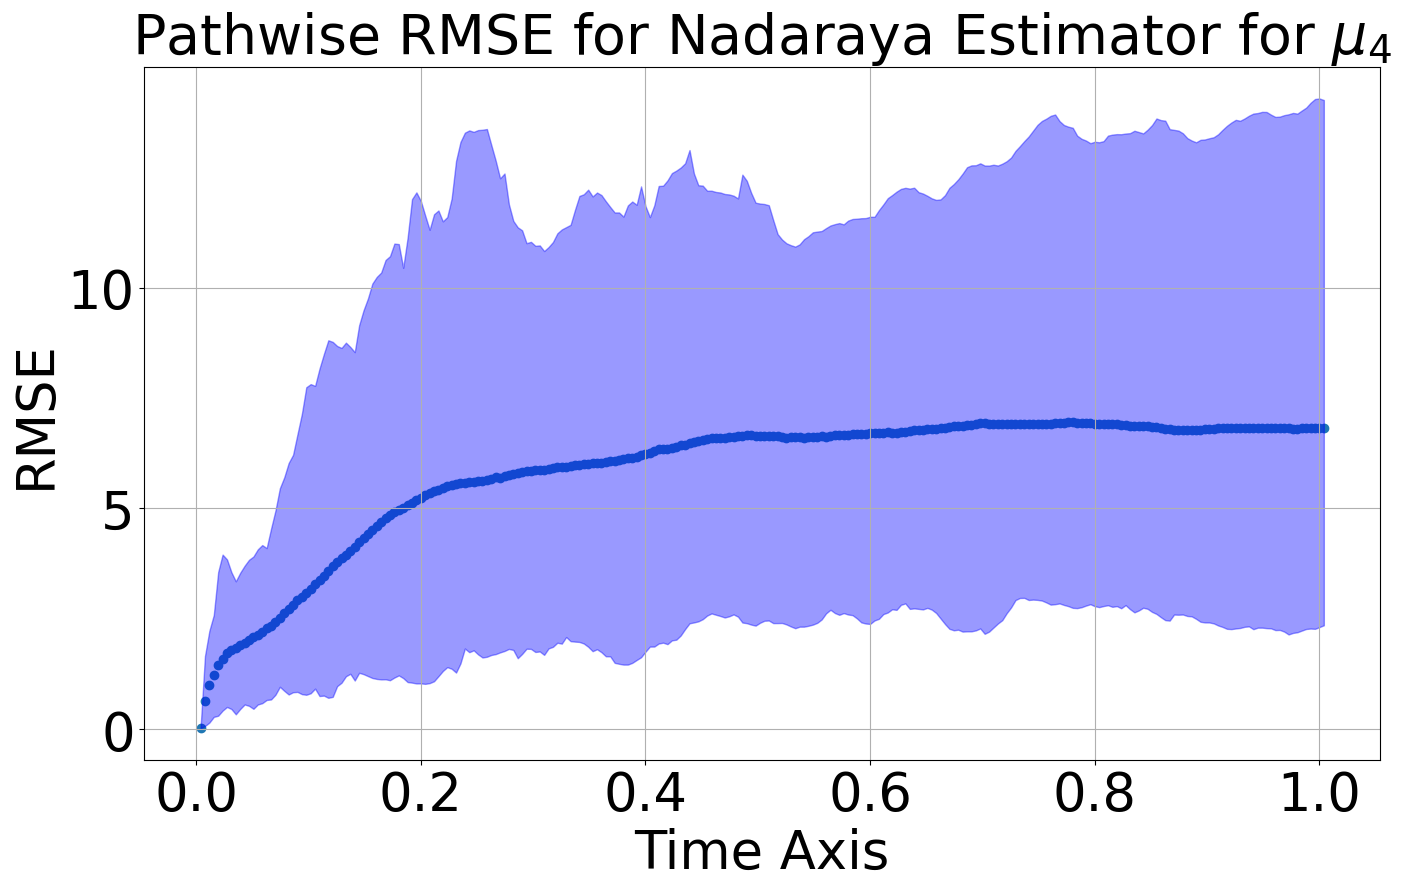

Final time cumulative MSE local-time error 6.818805733795702 with IQR ((2.350745661632979, 14.250433556416649))at bwidx 13

13
7.065217113401979 0.067501 6.818805733795702
14
7.984697761497559 0.0891251 6.818805733795702
15


In [9]:
curr_rmse = np.inf
toSave = True
i = 0
for file in zip(*[true_files, local_files, bws]):
    bw = file[-1]
    all_true_states = np.load(file[0])
    all_local_states = np.load(file[1])
    if all_local_states.shape[0] != 2: continue
    if (len(all_true_states.shape) == len(all_local_states.shape) == 4):
        time_steps = np.linspace(config.t0,config.deltaT*all_true_states.shape[2],all_true_states.shape[2])
        all_global_errors = np.sum(np.power(all_true_states- all_local_states,2), axis=-1)
        all_global_errors=all_global_errors.reshape(-1, all_global_errors.shape[-1])            # (K, N, T)
        total_local_errors = np.sqrt(np.mean(all_global_errors, axis=(0)))/np.sqrt(time_steps)
        all_paths_err = np.sqrt(all_global_errors)/np.sqrt(time_steps)
        total_local_errors[total_local_errors==np.inf] = 0.
        all_paths_err[all_paths_err==np.inf] = 0.
        total_local_errors_minq, total_local_errors_maxq  = np.quantile(all_paths_err, q=[0.005, 0.995], axis=0) # (T,)
        print(total_local_errors[-1], bw, curr_rmse)
        i += 1
        if total_local_errors[-1]  < curr_rmse:
            curr_rmse = total_local_errors[-1]
            fig, ax = plt.subplots(figsize=(14,9))
            plt.grid(True)
            ax.scatter(time_steps, total_local_errors)
            plt.fill_between(time_steps,y1=total_local_errors_minq, y2=total_local_errors_maxq, color="blue", alpha=0.4)
            ax.set_title(rf"Pathwise RMSE for Nadaraya Estimator for $\mu_4$",fontsize=40)
            ax.set_ylabel("RMSE", fontsize=38)
            ax.set_xlabel("Time Axis", fontsize=38)
            ax.tick_params(labelsize=38)
            plt.tight_layout()
            if toSave:
                plt.savefig((root_dir + f"DiffusionModelPresentationImages/IIDNadaraya/8DDimsNS/IIDNadaraya_fBiPot_{config.ndims}DDims_DriftTrack_{round(bw, 6)}bw_{round(total_local_errors_minq[-1], 8)}_MinIQR_{round(total_local_errors[-1], 8)}MeanIQR_{round(total_local_errors_maxq[-1], 8)}_MaxIQR").replace(".", "")+".png")
            plt.show()
            plt.close()
            print(f"Final time cumulative MSE local-time error {total_local_errors[-1]} with IQR ({total_local_errors_minq[-1], total_local_errors_maxq[-1]})at bwidx {i}\n")
        print(i)

In [10]:
from utils.resource_logger import wallclock_and_system_metrics
data = wallclock_and_system_metrics(config.nadaraya_resource_logging_path, inclusive=True)
data

{'progress_name': 'idx',
 'span_units': 3.0,
 'wall_clock_h_total': 10.78510036289692,
 'wall_clock_per_unit_h': 3.595033454298973,
 'cpu_avg_pct': 34.44074074074081,
 'cpu_peak_pct': 54.5,
 'ram_avg_gib': 156.85214317283953,
 'ram_peak_gib': 183.779768,
 'gpu_util_avg_pct': None,
 'gpu_util_peak_pct': None,
 'gpu_mem_avg_gib': None,
 'gpu_mem_peak_gib': None}